In [1]:
import pandas as pd
import joblib

In [2]:
df_test = pd.read_csv('insurance_claims _Test.csv') 

In [3]:
df_test.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [4]:
len(df_test.columns)

38

In [5]:
model = joblib.load('model.pkl')

In [6]:
scaler = joblib.load('scaler.pkl')

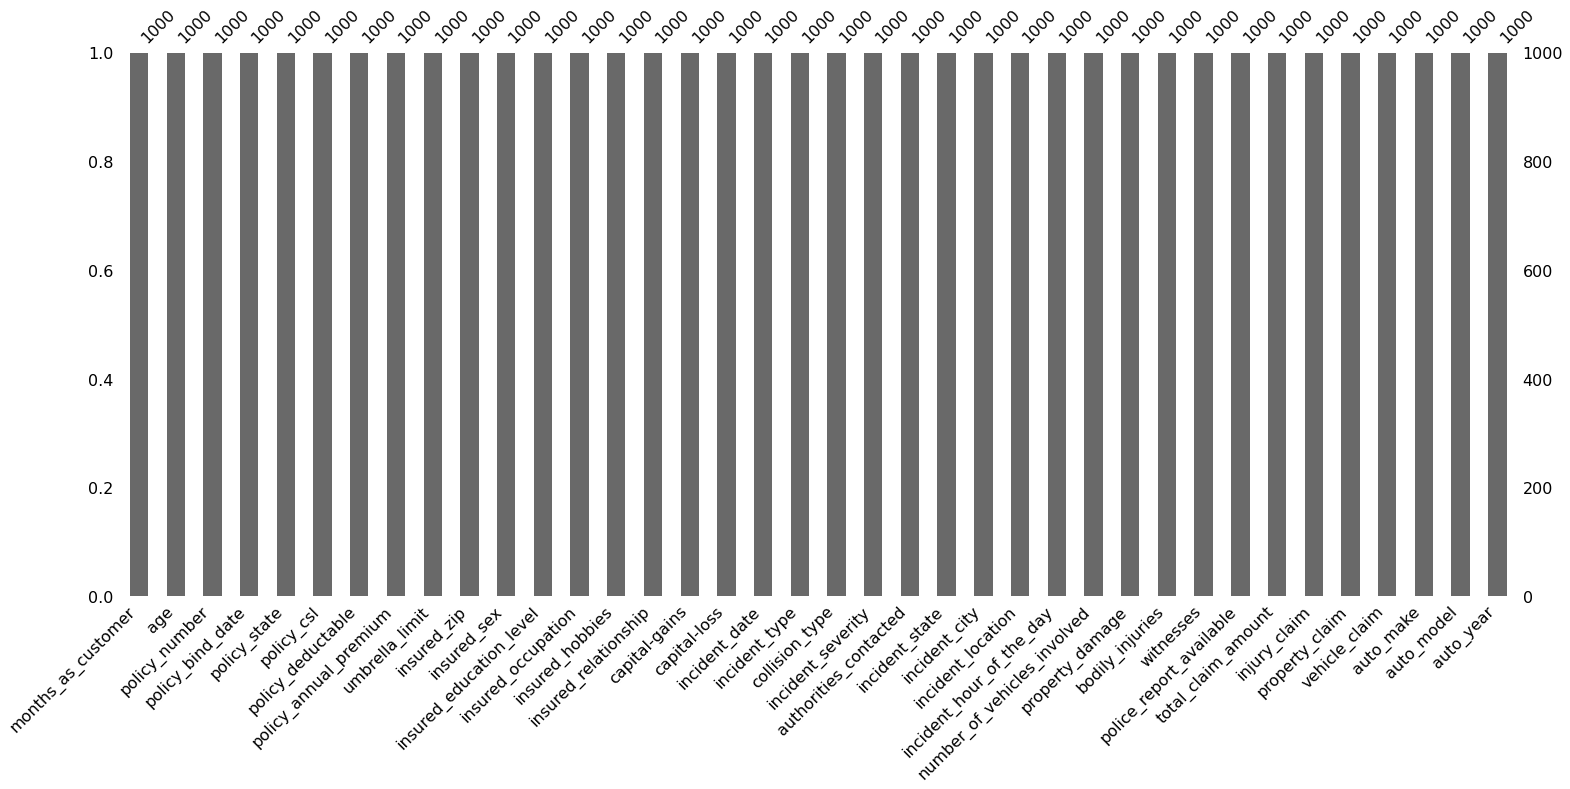

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

msno.bar(df_test)
plt.show()

In [8]:
df_test_master = df_test.copy()

to_drop = ['policy_annual_premium','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df_test_master.drop(to_drop, inplace = True, axis = 1)

In [9]:
df_test_master.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [10]:
df_test_master = pd.get_dummies(df_test_master)

In [11]:
df_test_master.columns

Index(['months_as_customer', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl_100/300', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-se

In [12]:
df_test_master.drop(columns = ['collision_type_?','property_damage_?','police_report_available_?'], inplace = True, axis = 1)

In [13]:
df_test_master.columns

Index(['months_as_customer', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl_100/300', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-se

In [14]:
df_test_master = df_test_master[['policy_number', 'months_as_customer'] + list(df_test_master.columns[2:])]


In [15]:
df_test_master.columns

Index(['policy_number', 'months_as_customer', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'policy_csl_100/300', 'policy_csl_250/500',
       'policy_csl_500/1000', 'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_adm-clerical',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-se

In [18]:
df_test_master.shape

(1000, 65)

In [24]:
# Create a copy of df_test
temp_df_test = df_test.copy()

# Add the 'fraud' column to temp_df_test
temp_df_test['fraud'] = ''

# Apply scaling to the relevant columns in df_test_master
scaled_data = scaler.transform(df_test_master.iloc[:, 1:13])

# Convert the column names to strings
feature_names = [str(col) for col in df_test_master.columns[1:13]]

# Create a DataFrame with scaled data and updated feature names
input_data = pd.DataFrame(scaled_data, columns=feature_names).join(df_test_master.iloc[:, 13:])

# Make predictions using the model
predictions = model.predict(input_data)

# Iterate over each row in df_test_master and add the prediction to temp_df_test
for i, policy_number in enumerate(df_test_master['policy_number']):
    temp_df_test.loc[temp_df_test['policy_number'] == policy_number, 'fraud'] = predictions[i]

print(temp_df_test)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [25]:
df_insurace = pd.read_csv('insurance_claims.csv')

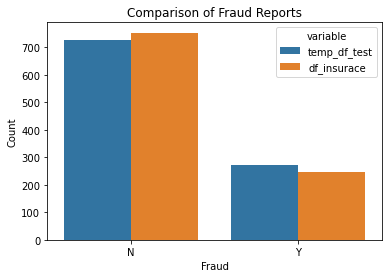

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each value in temp_df_test['fraud'] and df_insurace['fraud_reported']
temp_df_test_counts = temp_df_test['fraud'].value_counts()
df_insurace_counts = df_insurace['fraud_reported'].value_counts()

# Combine the counts into a single DataFrame
comparison_df = pd.DataFrame({'temp_df_test': temp_df_test_counts, 'df_insurace': df_insurace_counts})

# Reset the index to make 'fraud' a column
comparison_df = comparison_df.reset_index()

# Rename the columns
comparison_df.columns = ['fraud', 'temp_df_test', 'df_insurace']

# Plot the comparison
sns.barplot(x='fraud', y='value', hue='variable', data=pd.melt(comparison_df, id_vars='fraud'), ci=None)
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Comparison of Fraud Reports')
plt.show()


In [27]:
temp_df_test_counts

N    727
Y    273
Name: fraud, dtype: int64

In [28]:
df_insurace_counts

N    753
Y    247
Name: fraud_reported, dtype: int64

In [29]:
# Count the number of matching values in 'fraud' column of temp_df_test and df_insurace
matching_count = sum(temp_df_test['fraud'] == df_insurace['fraud_reported'])

# Calculate the total number of values
total_count = len(temp_df_test)

# Calculate the accuracy percentage
accuracy = (matching_count / total_count) * 100

# Print the accuracy percentage
print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: 81.40%


In [30]:
# Merge temp_df_test and df_insurace based on 'policy_number'
merged_df = temp_df_test.merge(df_insurace, on='policy_number')

# Filter the merged DataFrame for contradicting values
contradicting_df = merged_df[merged_df['fraud'] != merged_df['fraud_reported']]

# Get the policy numbers for the contradicting values
contradicting_policy_numbers = contradicting_df['policy_number'].unique()

# Print the policy numbers
print("Contradicting Policy Numbers:")
print(contradicting_policy_numbers)


Contradicting Policy Numbers:
[342868 214618 644081 558938 143972 115399 608513 908616 584859 200152
 485664 729634 524836 132902 332867 356590 500533 260845 498875 731450
 235220 193442 283414 981123 648397 620215 618659 565157 904191 575000
 288580 425973 125324 391652 922167 442795 602410 630226 586367 547744
 598124 604614 509928 174701 872734 476923 261119 280709 547802 187775
 146138 336047 737593 277767 367595 424862 779075 967756 526039 384618
 515698 297816 931625 951543 818413 583169 421940 340614 832746 386690
 216738 514424 388671 745200 999435 858060 873859 357713 890026 538466
 901083 302669 501692 355085 172307 432068 903203 373935 506333 247801
 758740 628337 574637 218456 971338 714738 976645 789208 795004 493161
 320251 215534 164988 110408 871432 852002 599174 349658 811042 550294
 998192 337158 361829 783494 425631 911429 497929 735844 276804 507545
 485642 796375 110084 714346 473338 521694 912665 431583 155912 111874
 307469 263108 261905 804219 593466 794951 1824

In [32]:
# Merge temp_df_test and df_insurace based on 'policy_number'
merged_df = temp_df_test.merge(df_insurace, on='policy_number')

# Filter the merged DataFrame for contradicting values
contradicting_df = merged_df[merged_df['fraud'] != merged_df['fraud_reported']]

# Get the policy numbers for the contradicting values
contradicting_policy_numbers = contradicting_df['policy_number'].unique()

# Add the results to a list
results = []

for policy_number in contradicting_policy_numbers:
    temp_df_fraud = temp_df_test[temp_df_test['policy_number'] == policy_number]['fraud'].values[0]
    insurace_df_fraud = df_insurace[df_insurace['policy_number'] == policy_number]['fraud_reported'].values[0]
    results.append((policy_number, temp_df_fraud, insurace_df_fraud))

# Print the results
print("Contradicting Policy Numbers:")
for result in results:
    print("Policy Number: {}, temp_df_test Fraud: {}, df_insurace Fraud: {}".format(result[0], result[1], result[2]))



Contradicting Policy Numbers:
Policy Number: 342868, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 214618, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 644081, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 558938, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 143972, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 115399, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 608513, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 908616, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 584859, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 200152, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 485664, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 729634, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 524836, temp_df_test Fraud: Y, df_insurace Fraud: N
Policy Number: 132902, temp_df_test Fraud: N, df_insurace Fraud: Y
Policy Number: 332867, temp_df_t

In [33]:
len(results)

186

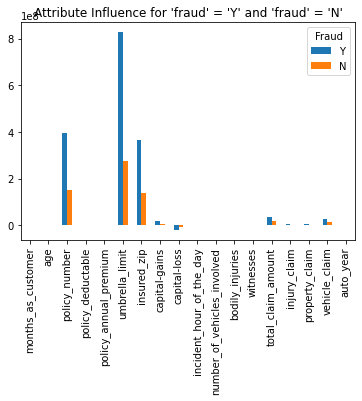

In [42]:
import matplotlib.pyplot as plt

# Group temp_df_test by 'fraud' and count occurrences of each attribute value
grouped_temp_df = temp_df_test.groupby('fraud').sum()

# Plot the attribute values for 'fraud' = 'Y' and 'fraud' = 'N' in one graph
ax = grouped_temp_df.T.plot(kind='bar', title="Attribute Influence for 'fraud' = 'Y' and 'fraud' = 'N'")
ax.legend(['Y', 'N'], title='Fraud')
plt.xticks(rotation=90)
plt.show()


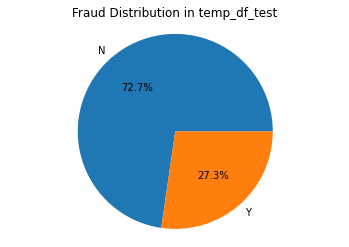

In [43]:
import matplotlib.pyplot as plt

# Count the occurrences of 'fraud' = 'Y' and 'fraud' = 'N'
fraud_counts = temp_df_test['fraud'].value_counts()

# Create a pie chart
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Fraud Distribution in temp_df_test')
plt.axis('equal')
plt.show()


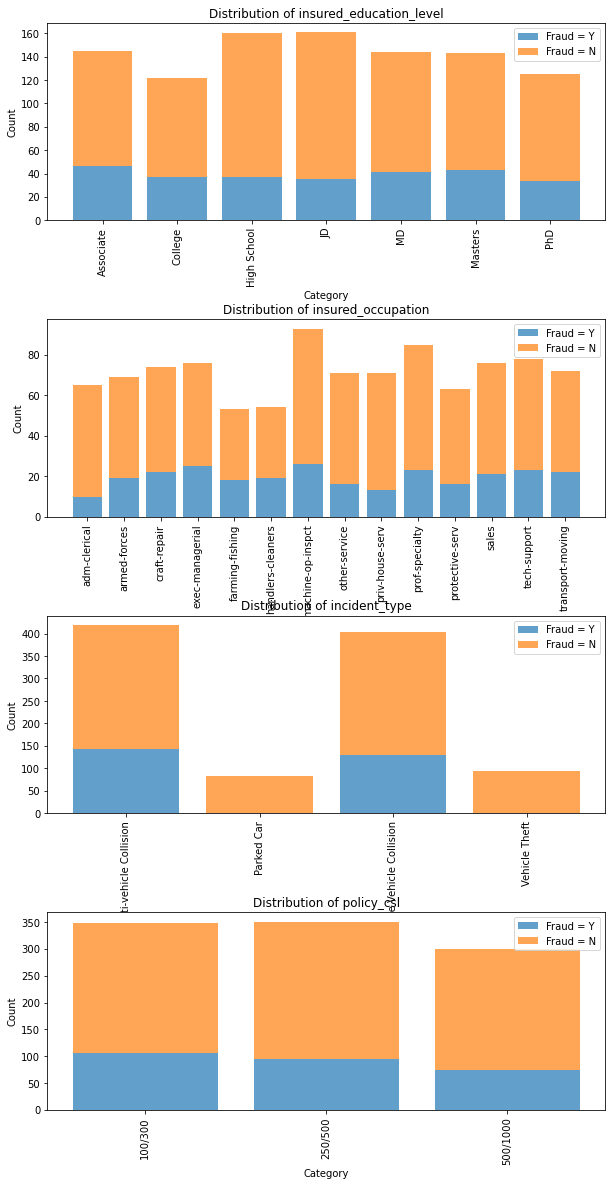

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Get the list of categorical variables
categorical_variables = ['insured_education_level', 'insured_occupation', 'incident_type', 'policy_csl']

# Create subplots for each categorical variable
num_subplots = len(categorical_variables)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, num_subplots * 5))
plt.subplots_adjust(hspace=0.5)

# Iterate over each categorical variable
for i, variable in enumerate(categorical_variables):
    # Count the occurrences of each category for 'fraud' = 'Y'
    fraud_y_counts = temp_df_test[temp_df_test['fraud'] == 'Y'][variable].value_counts()

    # Count the occurrences of each category for 'fraud' = 'N'
    fraud_n_counts = temp_df_test[temp_df_test['fraud'] == 'N'][variable].value_counts()

    # Get the unique categories
    categories = np.union1d(fraud_y_counts.index, fraud_n_counts.index)

    # Create an array for the x positions
    x = np.arange(len(categories))

    # Create a bar chart for the current categorical variable
    axes[i].bar(x, fraud_y_counts.reindex(categories, fill_value=0), label='Fraud = Y', alpha=0.7)
    axes[i].bar(x, fraud_n_counts.reindex(categories, fill_value=0), bottom=fraud_y_counts.reindex(categories, fill_value=0), label='Fraud = N', alpha=0.7)
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(categories, rotation=90)
    axes[i].legend()

# Show the plots
plt.show()



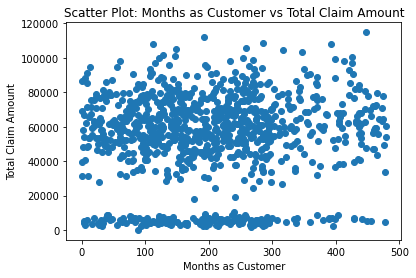

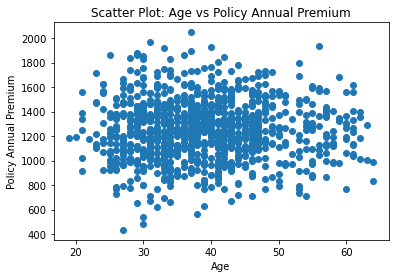

In [55]:
import matplotlib.pyplot as plt

# Scatter plot for 'months_as_customer' and 'total_claim_amount'
plt.scatter(temp_df_test['months_as_customer'], temp_df_test['total_claim_amount'])
plt.xlabel('Months as Customer')
plt.ylabel('Total Claim Amount')
plt.title('Scatter Plot: Months as Customer vs Total Claim Amount')
plt.show()

# Scatter plot for 'age' and 'policy_annual_premium'
plt.scatter(temp_df_test['age'], temp_df_test['policy_annual_premium'])
plt.xlabel('Age')
plt.ylabel('Policy Annual Premium')
plt.title('Scatter Plot: Age vs Policy Annual Premium')
plt.show()



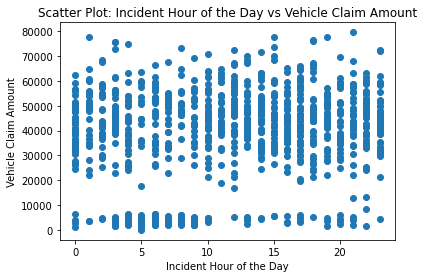

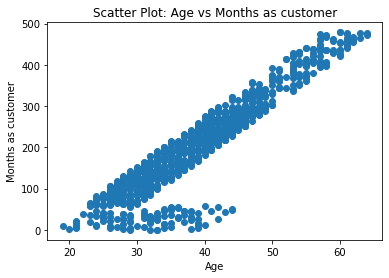

In [54]:
import matplotlib.pyplot as plt

# Scatter plot for 'incident_hour_of_the_day' and 'vehicle_claim'
plt.scatter(temp_df_test['incident_hour_of_the_day'], temp_df_test['vehicle_claim'])
plt.xlabel('Incident Hour of the Day')
plt.ylabel('Vehicle Claim Amount')
plt.title('Scatter Plot: Incident Hour of the Day vs Vehicle Claim Amount')
plt.show()

# Scatter plot for 'age' and 'months_as_customer'
plt.scatter(temp_df_test['age'], temp_df_test['months_as_customer'])
plt.xlabel('Age')
plt.ylabel('Months as customer')
plt.title('Scatter Plot: Age vs Months as customer')
plt.show()


In [56]:
df_fraud_Y = temp_df_test[temp_df_test['fraud'] == 'Y']
df_fraud_N = temp_df_test[temp_df_test['fraud'] == 'N']


In [58]:
df_fraud_Y.to_csv('df_fraud_Y.csv', index=False)
df_fraud_N.to_csv('df_fraud_N.csv', index=False)


NameError: name 'months_as_customer' is not defined